# Import Packages

In [83]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn
from sklearn.model_selection import train_test_split
import pandas
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
#ignoreing Warning

import warnings
warnings.filterwarnings("ignore")

# Insert File

In [84]:
filename = 'weatherAUS.csv'
# names = ["Date","Location","MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustDir","WindGustSpeed","WindDir9am","WindDir3pm","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am,Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm","RainToday","RainTomorrow"]
data = read_csv(filename)

# Dimention Of Dataset

In [85]:
data.shape

(145460, 23)

# Peek at the Data

In [86]:
data.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,12/6/2008,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,12/7/2008,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,12/8/2008,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,12/9/2008,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,12/10/2008,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


# Column Name

In [87]:
col_names=data.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Data Describe

In [88]:
data.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Data Info

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Class Distribution

In [90]:
data.groupby('RainTomorrow').size()

RainTomorrow
No     110316
Yes     31877
dtype: int64

# Check for unique Values

In [91]:
data['RainTomorrow'].unique()


array(['No', 'Yes', nan], dtype=object)

# Frequency of Unique Values

In [92]:
data['RainTomorrow'].value_counts()


No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

# Check for null/NA values

In [93]:
data['RainTomorrow'].isnull().sum()

3267

# Percentages of Values

In [94]:
RainTomorrow={"Yes":31877,
             'No':110316,
             'Missing values':3267}

In [95]:
for key,value in RainTomorrow.items():
    print(key ,':', value/len(data)*100,"%")

Yes : 21.914615701911178 %
No : 75.83940602227418 %
Missing values : 2.245978275814657 %


In [96]:
data.groupby('RainTomorrow').size()

RainTomorrow
No     110316
Yes     31877
dtype: int64

# Data Visualization

-->histogram

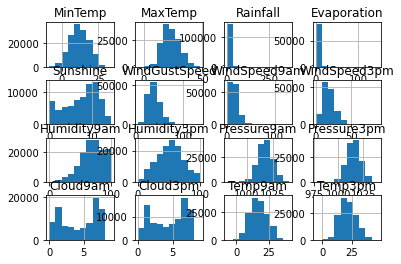

In [97]:

data.hist()
pyplot.show()

Text(0, 0.5, 'WindSpeed3pm')

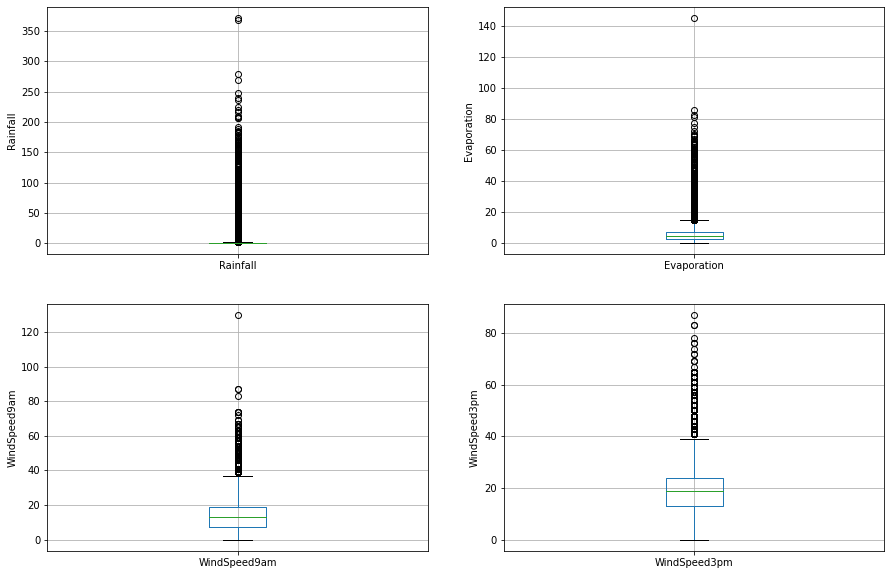

In [98]:
pyplot.figure(figsize=(15,10))


pyplot.subplot(2, 2, 1)
fig = data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


pyplot.subplot(2, 2, 2)
fig = data.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


pyplot.subplot(2, 2, 3)
fig = data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


pyplot.subplot(2, 2, 4)
fig = data.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

In [99]:
categorical= data.select_dtypes(include=['object'])
categorical.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,W,W,WNW,No,No
1,12/2/2008,Albury,WNW,NNW,WSW,No,No
2,12/3/2008,Albury,WSW,W,WSW,No,No
3,12/4/2008,Albury,NE,SE,E,No,No
4,12/5/2008,Albury,W,ENE,NW,No,No


# Multivariate Analysis

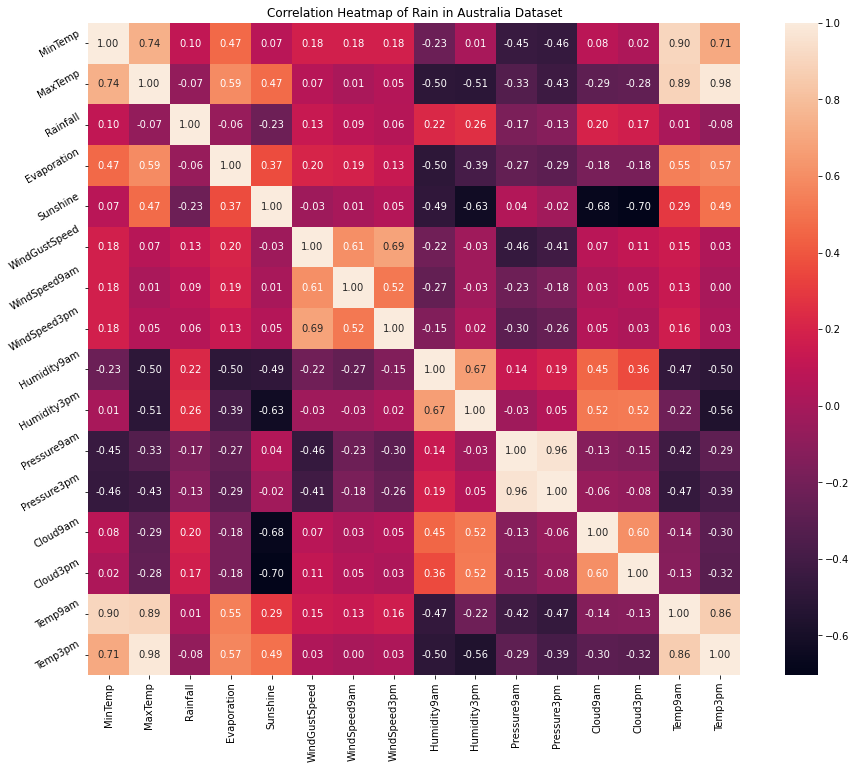

In [100]:
correlation = data.corr()
pyplot.figure(figsize=(16,12))
pyplot.title('Correlation Heatmap of Rain in Australia Dataset')
ax = seaborn.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
pyplot.show()

# Number of Null Values

In [101]:
dict={}
for i in list(data[categorical.columns]):
    dict[i]=data[i].isnull().sum()
pandas.DataFrame(dict,index=['number of null values']).transpose() 

,number of null values
Date,0
Location,0
WindGustDir,10326
WindDir9am,10566
WindDir3pm,4228
RainToday,3261
RainTomorrow,3267


In [102]:
for var in categorical:
    
    print(var, ' contains ', len(data[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels


In [103]:
categorical.isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [104]:
categorical['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

# Create Validation Dataset

In [105]:
X = data.drop(['RainTomorrow'], axis=1)

y = data['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [106]:
X_train.shape, X_test.shape

((116368, 22), (29092, 22))

In [107]:
# display categorical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [108]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [109]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp           1183
MaxTemp           1019
Rainfall          2617
Evaporation      50355
Sunshine         55899
WindGustSpeed     8218
WindSpeed9am      1409
WindSpeed3pm      2456
Humidity9am       2147
Humidity3pm       3598
Pressure9am      12091
Pressure3pm      12064
Cloud9am         44796
Cloud3pm         47557
Temp9am           1415
Temp3pm           2865
dtype: int64

In [110]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp            302
MaxTemp            242
Rainfall           644
Evaporation      12435
Sunshine         13936
WindGustSpeed     2045
WindSpeed9am       358
WindSpeed3pm       606
Humidity9am        507
Humidity3pm        909
Pressure9am       2974
Pressure3pm       2964
Cloud9am         11092
Cloud3pm         11801
Temp9am            352
Temp3pm            744
dtype: int64

In [111]:
# impute missing values in X_train and X_test with respective column median in X_train

for data1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        data1[col].fillna(col_median, inplace=True) 

In [112]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [113]:
# impute missing categorical variables with most frequent value

for data2 in [X_train, X_test]:
    data2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    data2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    data2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    data2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)
y_train.fillna(y_train.mode()[0], inplace=True)
y_test.fillna(y_test.mode()[0], inplace=True)

In [114]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Date           0
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [115]:
X_train.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [116]:
X_train[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
22926,3/12/2014,NorfolkIsland,ESE,ESE,ESE,No
80735,10/6/2016,Watsonia,NE,NNW,NNE,No
121764,8/31/2011,Perth,SW,N,SW,Yes
139821,6/11/2010,Darwin,ESE,ESE,E,No
1867,4/10/2014,Albury,E,ESE,E,Yes


# Build Models

In [117]:

def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])


    X_train['Rainfall'] = max_value(X_train, 'Rainfall', 2)
    X_train['Evaporation'] = max_value(X_train, 'Evaporation', 14.6)
    X_train['WindSpeed9am'] = max_value(X_train, 'WindSpeed9am', 37)
    X_train['WindSpeed3pm'] = max_value(X_train, 'WindSpeed3pm', 40.5)
    
    X_test['Rainfall'] = max_value(X_test, 'Rainfall', 2)
    X_test['Evaporation'] = max_value(X_test, 'Evaporation', 14.6)
    X_test['WindSpeed9am'] = max_value(X_test, 'WindSpeed9am', 37)
    X_test['WindSpeed3pm'] = max_value(X_test, 'WindSpeed3pm', 40.5)

In [118]:
X_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
22926,3/12/2014,NorfolkIsland,18.8,23.7,0.2,5.0,7.3,ESE,52.0,ESE,...,28.0,74.0,73.0,1016.6,1013.9,5.0,7.0,21.4,22.2,No
80735,10/6/2016,Watsonia,9.3,24.0,0.2,1.6,10.9,NE,48.0,NNW,...,24.0,74.0,55.0,1018.3,1014.6,3.0,5.0,14.3,23.2,No
121764,8/31/2011,Perth,10.9,22.2,1.4,1.2,9.6,SW,26.0,N,...,11.0,85.0,47.0,1017.6,1014.9,1.0,2.0,16.6,21.5,Yes
139821,6/11/2010,Darwin,19.3,29.9,0.0,9.2,11.0,ESE,43.0,ESE,...,17.0,44.0,37.0,1015.9,1012.1,1.0,1.0,23.2,29.1,No
1867,4/10/2014,Albury,15.7,17.6,12.4,4.7,8.4,E,20.0,ESE,...,13.0,100.0,100.0,1015.2,1010.5,8.0,8.0,16.5,17.3,Yes


In [119]:
cols = X_train.columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pandas.DataFrame(X_train, columns=[cols])

X_test = pandas.DataFrame(X_test, columns=[cols])
X_train.describe()

ValueError: could not convert string to float: '3/12/2014'